# Midterm
## BUS 20800: Big Data
## Due: 11:59 am (noon) on Feb 12, 2024


# Setup

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Setup codes
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import lasso_path, Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans,SpectralClustering,DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

_DATA_DIR = './MidtermData/'
# Note that the data file is also on the server shared folder /classes/20800_winter2024/Data/

----

# Problem 1. Regression (40 points)

For this question, you are provided with a monthly macroeconomic dataset that encompasses a wide variety of indicators, offering a comprehensive view of the U.S. economy. The dataset is updated monthly. Below, you will find a cleaned version of this dataset for your use. Your task is to develop a model aimed at forecasting the trend of the inflation rate. In the cleaned dataset provided, the inflation rate is denoted by the variable 'Y'. Focus your efforts on designing and proposing a model capable of accurately predicting the future movements of the inflation rate based on the data available.

The columns are code-named. For their realistic meanings in macroeconomics, please refer to the excel file `macrodata_appendix.csv`.

## Part I. Data preparation

Run the following cells to load the macroeconomic data. You don't need to modify any codes here.

In [95]:
# load data
Macro1 = pd.read_csv(_DATA_DIR+'FredMDlargeHor1.csv')
X = Macro1.drop('Inflation', axis=1)
y = Macro1['Inflation']
X.head(5)

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,2/1/1959,2593.596,2434.8,15.346,18369.56308,22.3966,23.7048,22.4617,31.9337,19.1147,...,30.7,29.6,15.179,63.554,18.302,10.167,2.14,2.46,2.05,83.5280
1,3/1/1959,2610.396,2452.7,15.491,18523.05762,22.7193,23.8483,22.5719,31.9337,19.4890,...,30.7,29.6,15.189,63.634,18.289,10.185,2.15,2.45,2.07,81.6405
2,4/1/1959,2627.446,2470.0,15.435,18534.46600,23.2032,24.1927,22.9026,32.4374,19.6138,...,30.7,29.6,15.219,63.698,18.300,10.221,2.16,2.47,2.08,81.8099
3,5/1/1959,2642.720,2486.4,15.622,18679.66354,23.5528,24.3936,23.1231,32.5925,20.0130,...,30.7,29.6,15.227,63.804,18.280,10.238,2.17,2.48,2.08,80.7315
4,6/1/1959,2650.841,2493.9,15.679,18849.75209,23.5797,24.5658,23.2885,32.4375,20.1628,...,30.8,29.7,15.271,63.931,18.321,10.275,2.17,2.50,2.09,78.6972


In [96]:
X = X.drop('sasdate',axis=1)

## Part II. Exploratory Data Analysis (EDA) (10 points)

Perform EDA to do some preliminary analysis. Answer the following questions.

+ How does the trend of inflation rate look like? 

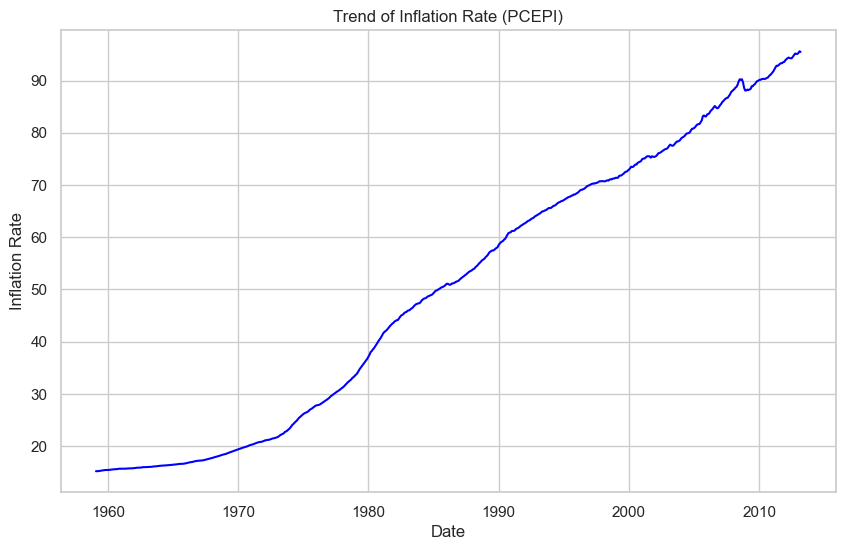

In [68]:
##############################################################################
### TODO: plot inflation
##############################################################################
# Your codes here
Macro1['sasdate'] = pd.to_datetime(Macro1['sasdate'])
plt.figure(figsize=(10, 6))
plt.plot(Macro1['sasdate'], Macro1['PCEPI'], color='blue')
plt.title('Trend of Inflation Rate (PCEPI)')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.show()
##############################################################################
# END OF YOUR CODE

### + Draw a plot to compare different variables' correlation with inflation rate. Which variables do you think are most useful?

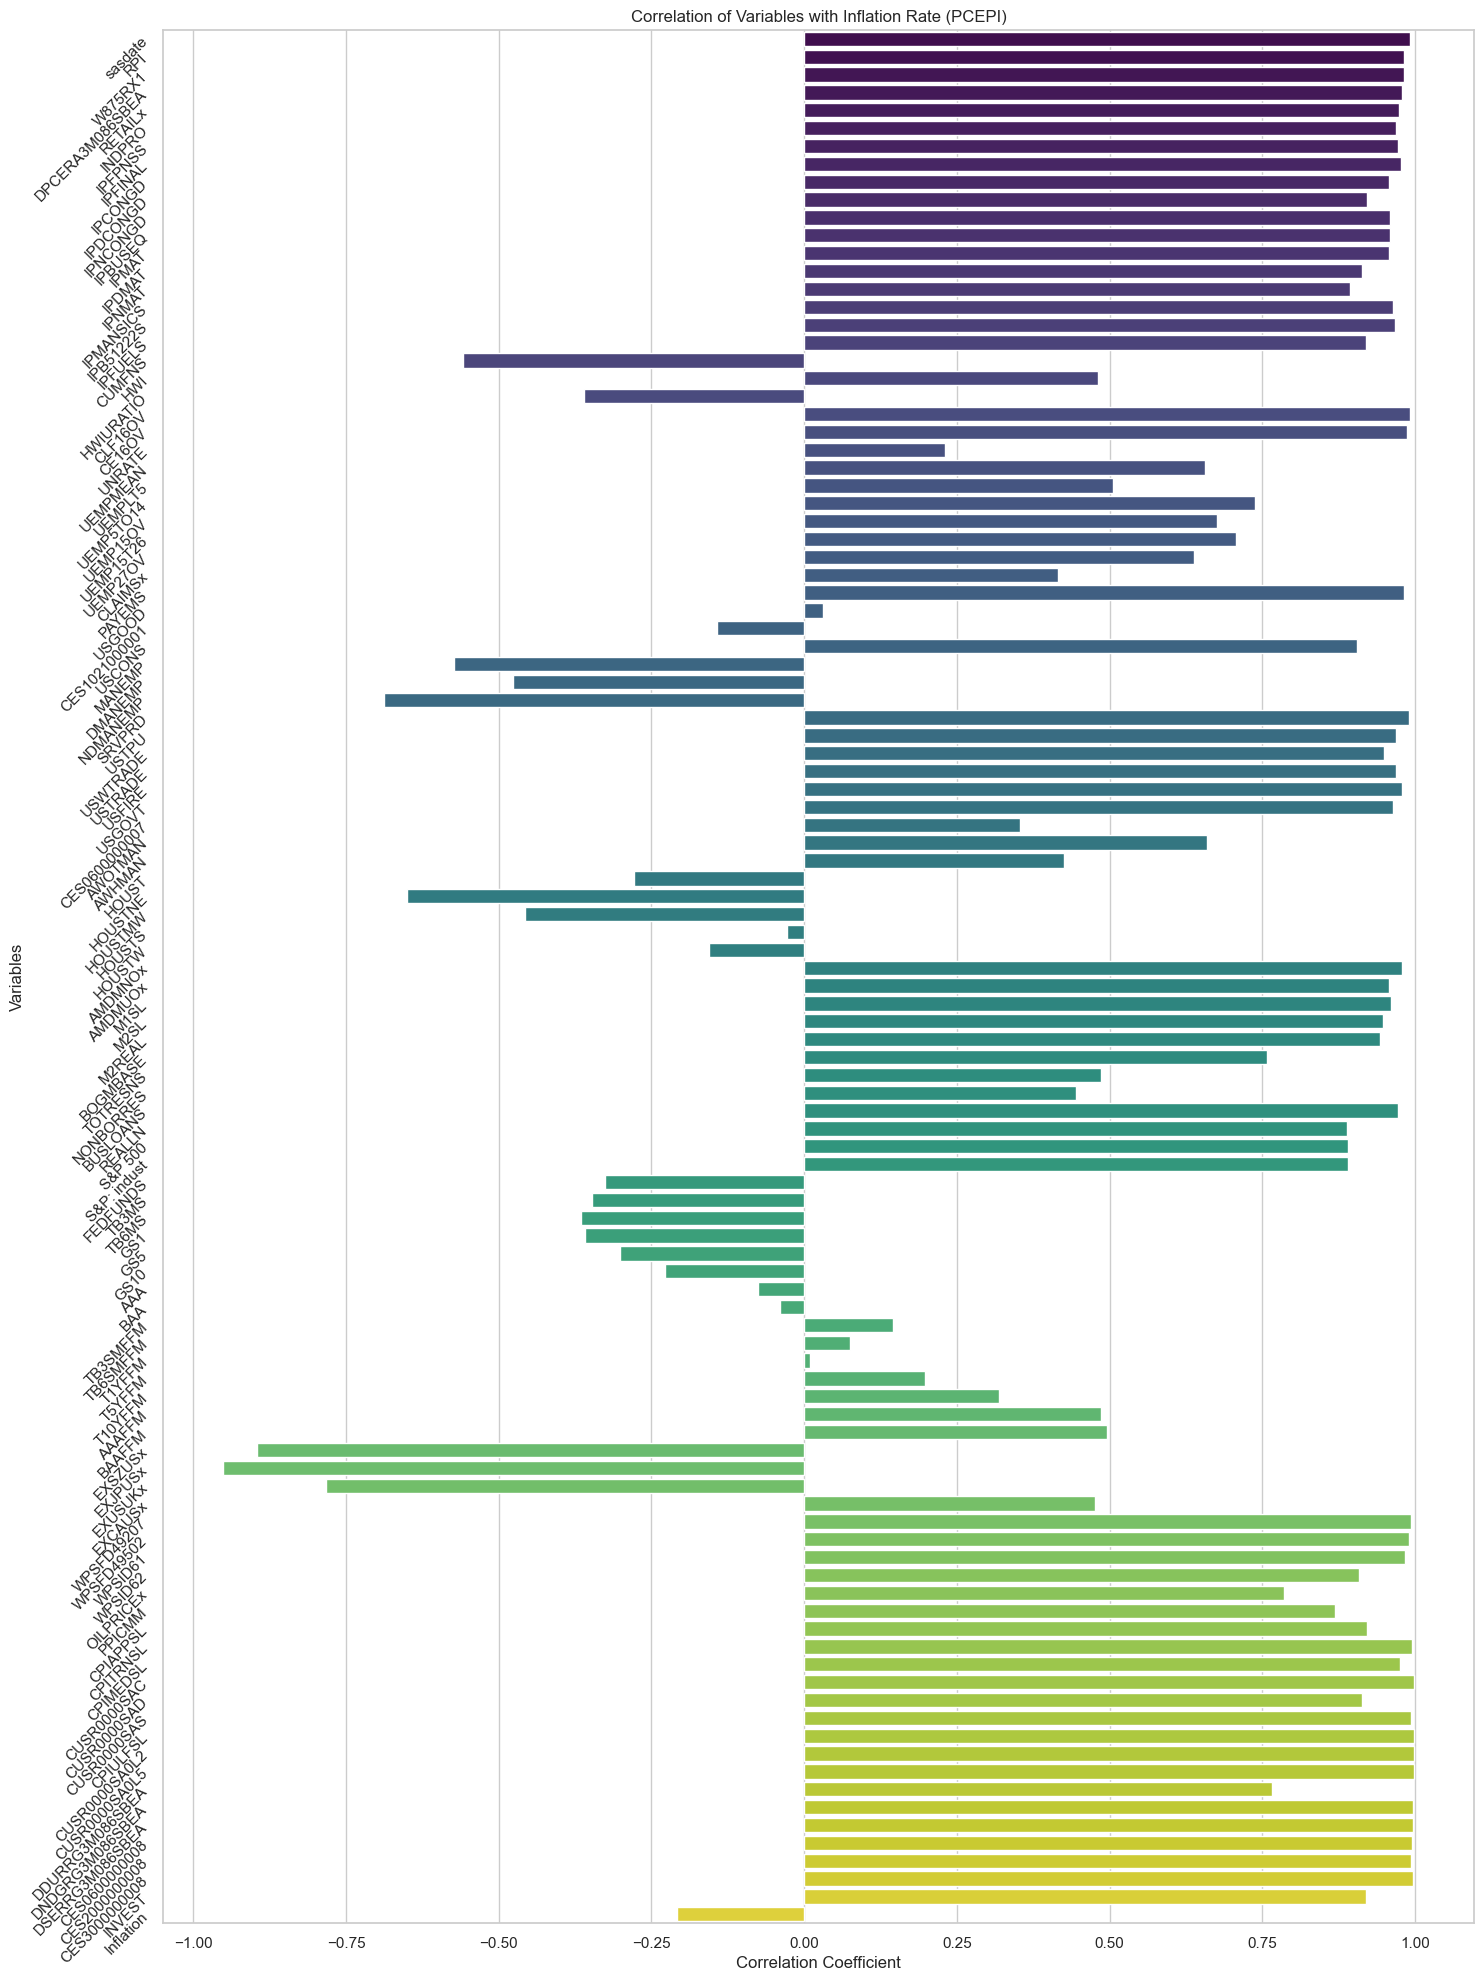

Variables with correlation > 0.75 with Inflation Rate (PCEPI): ['sasdate', 'RPI', 'W875RX1', 'DPCERA3M086SBEA', 'RETAILx', 'INDPRO', 'IPFPNSS', 'IPFINAL', 'IPCONGD', 'IPDCONGD', 'IPNCONGD', 'IPBUSEQ', 'IPMAT', 'IPDMAT', 'IPNMAT', 'IPMANSICS', 'IPB51222S', 'IPFUELS', 'CLF16OV', 'CE16OV', 'PAYEMS', 'USCONS', 'SRVPRD', 'USTPU', 'USWTRADE', 'USTRADE', 'USFIRE', 'USGOVT', 'AMDMNOx', 'AMDMUOx', 'M1SL', 'M2SL', 'M2REAL', 'BOGMBASE', 'BUSLOANS', 'REALLN', 'S&P 500', 'S&P: indust', 'WPSFD49207', 'WPSFD49502', 'WPSID61', 'WPSID62', 'OILPRICEx', 'PPICMM', 'CPIAPPSL', 'CPITRNSL', 'CPIMEDSL', 'CUSR0000SAC', 'CUSR0000SAD', 'CUSR0000SAS', 'CPIULFSL', 'CUSR0000SA0L2', 'CUSR0000SA0L5', 'DDURRG3M086SBEA', 'DNDGRG3M086SBEA', 'DSERRG3M086SBEA', 'CES0600000008', 'CES2000000008', 'CES3000000008', 'INVEST']


In [69]:
##############################################################################
### Hint: calculate correlation then use sns.barplot()
##############################################################################
# Your codes here
correlation = Macro1.corr()['PCEPI'].drop('PCEPI') 
plt.figure(figsize=(15, 20))
sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')
plt.title('Correlation of Variables with Inflation Rate (PCEPI)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.yticks(rotation=45, ha='right')
plt.subplots_adjust(left=0.3)
plt.tight_layout() 
plt.show()
high_correlation_vars = [var for var, corr in correlation.items() if corr > 0.75]
print("Variables with correlation > 0.75 with Inflation Rate (PCEPI):", high_correlation_vars)
##############################################################################
# END OF YOUR CODE

## Part III. Model Selection & Parameter Tuning (20 points)

In this part, you need to fit Lasso and Ridge model, each in two ways: using either an expanding window scheme or a rolling window scheme, and compare their out-of-sample prediction performance.

An expanding window in train-test split refers to a method where the training set starts with a small subset of data and gradually includes more data points over time, expanding to include more of the historical data, while keeping the test set fixed or moving along the time axis. 

In contrast, a rolling window approach involves moving both the training and the test sets forward in time by a fixed time interval, ensuring that model training and testing are performed on consecutive, non-overlapping datasets that are updated regularly as new data becomes available.

In the illustration below, `A` is for the rolling window and `B` is for the expanding window. We keep the test/validation set at the same length, and what differs is the length of training set we use.

<img src="rolling_expanding_window_illstration2.png" alt="Drawing" style="width: 1000px;" align="center"/>

### Step 1: Set Up LASSO & Ridge Model

The following functions are for your ridge and lasso regression for rolling window and expanding window. We have provided you with the full implementation of the rolling window scheme. Please fill the blank in the function `expanding_window_iterator`.

In [10]:
# generate rolling window iterator
def rolling_window_iterator(data, train_size=50, validation_size=10):
    tscv_rolling = []
    for i in range(len(data) - train_size - validation_size):
        # index for training and validation
        train_index = data[i:(i+train_size)].index.values.astype(int)
        validation_index = data[(i+train_size):(i+train_size+validation_size)].index.values.astype(int)
        # append to the list
        tscv_rolling.append((train_index, validation_index))
    return tscv_rolling

# generate expanding window iterator
def expanding_window_iterator(data, train_size=50, validation_size=10):
    tscv_expanding = []
    for i in range(len(data) - train_size - validation_size):
        ##############################################################################
        ### TODO: mimicking the rolling window iterator, implement expanding window iterator
        ##############################################################################
        train_index = data[:i + train_size].index.values.astype(int)
        validation_index = data[(i + train_size):(i + train_size + validation_size)].index.values.astype(int)
        ##############################################################################
        # END OF YOUR CODE
        
        tscv_expanding.append((train_index, validation_index))
    return tscv_expanding

In [81]:
# functions to calculate deviance and run Lasso & Ridge
def deviance(y, pred, family):
    if family == 'gaussian':
        return np.sum((y - pred)**2)
    if family == 'binomial':
        return -2 * np.sum(y * np.log(pred) + (1-y) * np.log(1-pred))
    

def lasso_alphas(X_train, y_train, X_valid, y_valid, alphas):
    """ Get series of dev0 and dev for given training and validation data and alphas
    X_train: np.array of training covariates
    y_train: np.array of training labels
    X_valid: np.array of validation covariates
    y_valid: np.array of validation labels
    alphas: array of penalty strength
    """
    
    # define scalar
    Xscaler = StandardScaler().fit(X_train) 
    yscaler = StandardScaler().fit(y_train) 
    
    # define scaled dataframe
    X_train_scaled = Xscaler.transform(X_train)
    y_train_scaled = yscaler.transform(y_train)
    X_valid_scaled = Xscaler.transform(X_valid)
    
    # perform lasso with alphas
    dev0_ser, dev_ser = pd.Series(index=alphas), pd.Series(index=alphas)
    alphas, coefs, _ = lasso_path(X_train_scaled, y_train_scaled, alphas=alphas)
    coefs = coefs[0]

    for idx, alpha in enumerate(alphas):
        model = Lasso(alpha=alpha)
        coef = coefs[:, idx]
        intercept = (X_train_scaled @ coef - y_train_scaled).reshape(-1).mean()
        model.coef_ = coef
        model.intercept_ = intercept
        
        # make predictions with the rebuilt lasso model 
        y_pred_scaled = model.predict(X_valid_scaled).reshape(-1, 1)
        y_pred = yscaler.inverse_transform(y_pred_scaled).reshape(-1)
        
        # calculate deviance
        dev0 = deviance(y_valid, y_train.mean(), family = 'gaussian')
        dev = deviance(y_valid, y_pred, family = 'gaussian')
        
        dev0_ser.loc[alpha] = dev0
        dev_ser.loc[alpha] = dev
    
    return dev0_ser, dev_ser


def ridge_alphas(X_train, y_train, X_valid, y_valid, alphas):
    """ Get series of dev0 and dev for given training and validation data and alphas
    X_train: np.array of training covariates
    y_train: np.array of training labels
    X_valid: np.array of validation covariates
    y_valid: np.array of validation labels
    alphas: array of penalty strength
    """
    # Standardize the features
    Xscaler = StandardScaler().fit(X_train)
    yscaler = StandardScaler().fit(y_train.reshape(-1, 1))  # Ensure y_train is 2D for compatibility
    
    X_train_scaled = Xscaler.transform(X_train)
    y_train_scaled = yscaler.transform(y_train.reshape(-1, 1)).flatten()  # Flatten to 1D for model fitting
    X_valid_scaled = Xscaler.transform(X_valid)
    
    # Initialize series to store deviances
    dev0_ser, dev_ser = pd.Series(index=alphas), pd.Series(index=alphas)
    
    for alpha in alphas:
        model = Ridge(alpha=alpha)
        model.fit(X_train_scaled, y_train_scaled)
        
        y_pred_scaled = model.predict(X_valid_scaled)
        y_pred = yscaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
        
        # Calculate deviance
        dev0 = deviance(y_valid, np.repeat(y_train.mean(), len(y_valid)), family='gaussian')
        dev = deviance(y_valid, y_pred, family='gaussian')
        
        dev0_ser[alpha] = dev0
        dev_ser[alpha] = dev
    
    return dev0_ser, dev_ser

**Method 1:** Rolling Window for Lasso Regression

Finish the codes below for lasso regression with rolling window. Return the best alpha and out-of-sample MSE and R2 for your designed model.

In [82]:
rolling_list = rolling_window_iterator(y)
alphas = 5 ** (np.linspace(-8, 1, 50))
rolling_lasso_mse_table = pd.DataFrame(index=alphas, columns=range(len(rolling_list)))
rolling_lasso_mse_table.index.name = "alpha"
rolling_lasso_r2_table = pd.DataFrame(index=alphas, columns=range(len(rolling_list)))
rolling_lasso_r2_table.index.name = "alpha"

for k in tqdm(range(len(rolling_list))):
##############################################################################
### TODO: fit ridge regression for each rolling window and record its out-of-sample MSE and R2
##############################################################################
    # Your codes here
    train_index, validation_index = rolling_list[k]
    
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index].values.reshape(-1, 1) 
    X_valid = X.iloc[validation_index]
    y_valid = y.iloc[validation_index].values.reshape(-1, 1) 
    
    dev0_ser, dev_ser = lasso_alphas(X_train, y_train, X_valid, y_valid, alphas)
    
    rolling_lasso_mse_table.iloc[:, k] = dev_ser.values
    rolling_lasso_r2_table.iloc[:, k] = 1 - dev_ser.values / dev0_ser.values
##############################################################################
# END OF YOUR CODE

rolling_lasso_mse_table_mean = rolling_lasso_mse_table.mean(axis=1)
rolling_lasso_r2_table_mean = rolling_lasso_r2_table.mean(axis=1)
rolling_lasso_table_mean = rolling_lasso_mse_table_mean

100%|█████████████████████████████████████████| 590/590 [00:13<00:00, 44.63it/s]


In [83]:
##############################################################################
### TODO: find your best alpha based on MSE
##############################################################################
rolling_lasso_table_mean = pd.to_numeric(rolling_lasso_table_mean, errors='coerce')
ind_min1 = rolling_lasso_table_mean.idxmin()
alpha_best = alphas[int(ind_min1)]
print("Best alpha for rolling window Lasso:", alpha_best)

best1_mse = rolling_lasso_mse_table.mean(axis=1).min()
best1_r2 = rolling_lasso_r2_table.mean(axis=1).max()
print("Best MSE for rolling window Lasso:", best1_mse)
print("Best R2 for rolling window Lasso:", best1_r2)
##############################################################################
# END OF YOUR CODE

Best alpha for rolling window Lasso: 2.56e-06
Best MSE for rolling window Lasso: 0.0008759994629573489
Best R2 for rolling window Lasso: -9.0


**Method 2:** Rolling Window for Ridge Regression

Finish the codes below for ridge regression with rolling window. Return the best alpha and out-of-sample MSE and R2 for your designed model.

In [86]:
# generate rolling window iterator for ridge regression
rolling_list = rolling_window_iterator(y)
alphas = 5**(np.linspace(-8,1,50))
rolling_ridge_mse_table = pd.DataFrame(index = alphas, columns = range(len(rolling_list)))
rolling_ridge_mse_table.index.name = "alpha"
rolling_ridge_r2_table = pd.DataFrame(index = alphas, columns = range(len(rolling_list)))
rolling_ridge_r2_table.index.name = "alpha"

for k in tqdm(range(len(rolling_list))):
##############################################################################
### TODO: fit ridge regression for each rolling window and record its out-of-sample MSE and R2
##############################################################################
    # Your codes here
    train_index, validation_index = rolling_list[k]
    
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index].values.reshape(-1, 1) 
    X_valid = X.iloc[validation_index]
    y_valid = y.iloc[validation_index].values.reshape(-1, 1)  
    
    dev0_ser, dev_ser = ridge_alphas(X_train, y_train, X_valid, y_valid, alphas)
    
    rolling_ridge_mse_table.iloc[:, k] = dev_ser.values
    rolling_ridge_r2_table.iloc[:, k] = 1 - dev_ser.values / dev0_ser.values
##############################################################################
# END OF YOUR CODE
rolling_ridge_mse_table_mean = rolling_ridge_mse_table.mean(axis=1)
rolling_ridge_r2_table_mean = rolling_ridge_r2_table.mean(axis=1)

100%|█████████████████████████████████████████| 590/590 [00:24<00:00, 24.37it/s]


In [87]:
##############################################################################
### TODO: find your best alpha based on MSE
##############################################################################
# Your codes here
rolling_ridge_mse_table_mean = pd.to_numeric(rolling_ridge_mse_table_mean, errors='coerce')
ind_min2 = rolling_ridge_mse_table_mean.idxmin()
alpha_best = alphas[int(ind_min2)]
print("Best alpha for rolling window Ridge:", alpha_best)

best2_mse = rolling_ridge_mse_table_mean.min()
best2_r2 = rolling_ridge_r2_table_mean.max()
print("Best MSE for rolling window Ridge:", best2_mse)
print("Best R2 for rolling window Ridge:", best2_r2)
##############################################################################
# END OF YOUR CODE

Best alpha for rolling window Ridge: 1.1224091379401773e-05
Best MSE for rolling window Ridge: 0.0009041384923401001
Best R2 for rolling window Ridge: -0.08029950165790653


**Method 3:** Expanding Window for Lasso Regression

Finish the codes below for lasso regression with expanding window. Return the best alpha and out-of-sample MSE and R2 for your designed model.

In [88]:
# generate expanding window iterator
expanding_list = expanding_window_iterator(y)
alphas = 5**(np.linspace(-8,1,50))
expanding_lasso_mse_table = pd.DataFrame(index = alphas, columns = range(len(expanding_list)))
expanding_lasso_mse_table.index.name = "alpha"
expanding_lasso_r2_table = pd.DataFrame(index = alphas, columns = range(len(expanding_list)))
expanding_lasso_r2_table.index.name = "alpha"

X_expanded = [X.iloc[train_index] for train_index, _ in expanding_list]
y_expanded = [y.iloc[train_index] for train_index, _ in expanding_list]

for k in tqdm(range(len(expanding_list))):
##############################################################################
### TODO: fit lasso regression for each expanding window and record its out-of-sample MSE and R2
##############################################################################
    # Your codes here
    train_index, _ = expanding_list[k]
    
    X_train = X_expanded[k]
    y_train = y_expanded[k].values.reshape(-1, 1) 
    
    dev0_ser, dev_ser = lasso_alphas(X_train, y_train, X_valid, y_valid, alphas)
    
    expanding_lasso_mse_table.iloc[:, k] = dev_ser.values
    expanding_lasso_r2_table.iloc[:, k] = 1 - dev_ser.values / dev0_ser.values
##############################################################################
# END OF YOUR CODE

expanding_lasso_mse_table_mean = expanding_lasso_mse_table.mean(axis=1)
expanding_lasso_r2_table_mean = expanding_lasso_r2_table.mean(axis=1) 

100%|█████████████████████████████████████████| 590/590 [00:21<00:00, 26.89it/s]


In [89]:
##############################################################################
### TODO: find your best alpha based on MSE
##############################################################################
# Your codes here
expanding_lasso_mse_table_mean = pd.to_numeric(expanding_lasso_mse_table_mean, errors='coerce')
ind_min3 = expanding_lasso_mse_table_mean.idxmin()
alpha_best =  alphas[int(ind_min3)]
print("Best alpha for expanding window Lasso:", alpha_best)

best3_mse = expanding_lasso_mse_table_mean.mean()
best3_r2 = expanding_lasso_r2_table_mean.mean()
print("Best MSE for rolling window Lasso:", best3_mse)
print("Best R2 for rolling window Lasso:", best3_r2)
##############################################################################
# END OF YOUR CODE

Best alpha for expanding window Lasso: 2.56e-06
Best MSE for rolling window Lasso: 0.0011325994285462547
Best R2 for rolling window Lasso: -9.008280595489564


**Method 4:** Expanding Window for Ridge Regression

Finish the codes below for ridge regression with expanding window. Return the best alpha and out-of-sample MSE and R2 for your designed model.

In [90]:
# generate expanding window iterator
expanding_list = expanding_window_iterator(y)
alphas = 5**(np.linspace(-8,1,50))
expanding_ridge_mse_table = pd.DataFrame(index = alphas, columns = range(len(expanding_list)))
expanding_ridge_mse_table.index.name = "alpha"
expanding_ridge_r2_table = pd.DataFrame(index = alphas, columns = range(len(expanding_list)))
expanding_ridge_r2_table.index.name = "alpha"

for k in tqdm(range(len(expanding_list))):
##############################################################################
### TODO: fit ridge regression for each expanding window and record its out-of-sample MSE and R2
##############################################################################
    # Your codes here
    train_index, _ = expanding_list[k]
    
    X_train = X_expanded[k]
    y_train = y_expanded[k].values.reshape(-1, 1)  # Reshape to 2D array
    
    dev0_ser, dev_ser = ridge_alphas(X_train, y_train, X_valid, y_valid, alphas)
    
    expanding_ridge_mse_table.iloc[:, k] = dev_ser.values
    expanding_ridge_r2_table.iloc[:, k] = 1 - dev_ser.values / dev0_ser.values
##############################################################################
# END OF YOUR CODE

expanding_ridge_mse_table_mean = expanding_ridge_mse_table.mean(axis=1) 
expanding_ridge_r2_table_mean = expanding_ridge_r2_table.mean(axis=1) 

100%|█████████████████████████████████████████| 590/590 [00:28<00:00, 20.75it/s]


In [91]:
##############################################################################
### TODO: find your best alpha based on MSE
##############################################################################
# Your codes here
expanding_ridge_mse_table_mean = pd.to_numeric(expanding_ridge_mse_table_mean, errors='coerce')
ind_min4 = expanding_ridge_mse_table_mean.idxmin()
alpha_best = alphas[int(ind_min4)]
print("Best alpha for expanding window Ridge:", alpha_best)

best4_mse = expanding_ridge_mse_table_mean.mean()
best4_r2 = expanding_ridge_r2_table_mean.mean()
print("Best MSE for rolling window Lasso:", best4_mse)
print("Best R2 for rolling window Lasso:", best4_r2)
##############################################################################
# END OF YOUR CODE

Best alpha for expanding window Ridge: 1.1224091379401773e-05
Best MSE for rolling window Lasso: 0.0011334281672895413
Best R2 for rolling window Lasso: -0.001600171117131431


### Step 2: Model Comparison

Compare your designed models regarding OOS MSE and R2. What's your conclusion?

In [92]:
lasso_rolling_mse = rolling_lasso_mse_table_mean[ind_min1]
lasso_rolling_r2 = rolling_lasso_r2_table_mean[ind_min1]

ridge_rolling_mse = rolling_ridge_mse_table_mean[ind_min2]
ridge_rolling_r2 = rolling_ridge_r2_table_mean[ind_min2]

lasso_expanding_mse = expanding_lasso_mse_table_mean[ind_min3]
lasso_expanding_r2 = expanding_lasso_r2_table_mean[ind_min3]

ridge_expanding_mse = expanding_ridge_mse_table_mean[ind_min4]
ridge_expanding_r2 = expanding_ridge_r2_table_mean[ind_min4]


# OOS MSE
# print(f"MSE for Baseline Model:", deviance(list(y[1:]), in_sample_pred, family = 'gaussian'))
print("MSE for Lasso with expanding window:", ridge_expanding_mse)
print("MSE for Ridge with expanding window:", lasso_expanding_mse)
print("MSE for Lasso with rolling window:", ridge_rolling_mse)
print("MSE for Ridge with rolling window:", lasso_rolling_mse)

# OOS R2
# print("R2 for baseline:", 1 - dev0/deviance(list(y[1:]), in_sample_pred, family = 'gaussian'))
print("ridge_expanding R2:", ridge_expanding_r2)
print("lasso_expanding R2:", lasso_expanding_r2)
print("ridge_rolling R2:", ridge_rolling_r2)
print("lasso_rolling R2:", lasso_rolling_r2)


MSE for Lasso with expanding window: 0.0011331982178897587
MSE for Ridge with expanding window: 0.0011312699362946883
MSE for Lasso with rolling window: 0.0009041384923401001
MSE for Ridge with rolling window: 0.0008759994629573489
ridge_expanding R2: -0.0013528707056180442
lasso_expanding R2: -8.999060608269838
ridge_rolling R2: -0.08029950165790653
lasso_rolling R2: -9.0


Your answer: All optimal alphas were the same for each linear regression model, Lasso and Ridge. The lasso models had an optimal alpha at a = 2.56e-06 ~ 0. The ridge models had an optimal alpha at a = 1.1224091379401773e-05; both approximately zero, which is good. The model that performed the best, in terms of MSE, is the models using the rolling window with performed the best; Lasso with MSE = 0.000904 and Ridge with MSE = 0.000876.The model that performed the best, in terms of R^2, is the Ridge with the expanding window with an R^2 = -0.00135. The MSE for both expanding window models are both lower than that for the rolling window, at MSE = 0.00113. The R^2 for the both ridge models are substantially lower than the two lasso models (-0.0014 and -0.0803), they offer valid values for this metric where we can actually draw meaning from them because 0<abs(r^2)<1. The two lasso r^2 scores are approximately -9, suggesting a worse performance. Overall, the models operating under the rolling window tended to perform better than those under the expanding window. They both performed the best in terms of MSE with the lowest two scores. In terms of R^2 the expanding window models produced the 1st and 3rd best R^2 models out of the four total. 

## Part IV. Prediction Competition (10 points)

Now you are given additional observations below (variable name 'X_pred'). Try your best to predict their prices. Submit your final prediction. Your score will depend on your predciton MSE.

In [97]:
Macro1_pred = pd.read_csv(_DATA_DIR+'FredMDlargeHor1_pred.csv')
X_pred = Macro1_pred.drop('sasdate',axis=1)

In [98]:
# data normalization 
Xscaler = StandardScaler().fit(X)
yscaler = StandardScaler().fit(y.values.reshape(-1,1))
X_pred = Xscaler.transform(X_pred)

In [99]:
##############################################################################
### TODO: make your predictions
##############################################################################
y_pred = ridge_model.predict(X_pred)

y_pred = yscaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)

true_prices = X_pred[:, 0]  

mse = mean_squared_error(true_prices, y_pred)

print("Mean Squared Error (MSE):", mse)
print("(Standardized) Final Predictions:", y_pred)
##############################################################################
# END OF YOUR CODE

Mean Squared Error (MSE): 6.836064086163801
(Standardized) Final Predictions: [-0.00045036 -0.00045035 -0.0004511  -0.00045116 -0.00045197 -0.0004522
 -0.00045232 -0.00045258 -0.00045291 -0.00045233 -0.00045242 -0.00045275
 -0.00045267 -0.00045312 -0.00045383 -0.00045416 -0.00045416 -0.00045445
 -0.00045413 -0.00045429 -0.000454   -0.00045411 -0.00045413 -0.00045441
 -0.00045426 -0.0004546  -0.00045466 -0.00045509 -0.00045468 -0.00045517
 -0.00045468 -0.00045478 -0.00045443 -0.00045381 -0.00045337 -0.00045314
 -0.00045327 -0.00045346 -0.00045287 -0.00045237 -0.00045243 -0.0004525
 -0.0004527  -0.00045317 -0.00045345 -0.00045276 -0.00045304 -0.00045306
 -0.00045332 -0.00045311 -0.00045261 -0.00045243 -0.00045295 -0.00045322
 -0.00045282 -0.00045322 -0.00045339 -0.00045369 -0.00045469 -0.00045474
 -0.00045504 -0.00045489 -0.0004549  -0.00045399 -0.00045435 -0.00045413
 -0.00045391 -0.00045363 -0.00045299 -0.00045251 -0.0004526  -0.00045262
 -0.00045208 -0.00045196 -0.00045204 -0.00045196

In [100]:
# you donot need to run this code
#y_true = Macro1_pred['PCEPI']
#print("mse: ", mean_squared_error(y_pred, y_true))

# Problem 2. Classification (30 points)

In this problem, you need to classficy the following images into their appropriate label.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels. The rest of the columns contain the pixel-values of the associated image.

See the example below:

<img src="fashion.png" alt="Drawing" style="width: 1000px;" align="center"/>

## Part I. Data preparation

Run the following cells to load the data and get the visualization. You don't need to modify any codes here.

In [47]:
clothing_data = pd.read_csv(_DATA_DIR+'clothing_train.csv')

In [48]:
# Mapping Classes
clothing_class = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

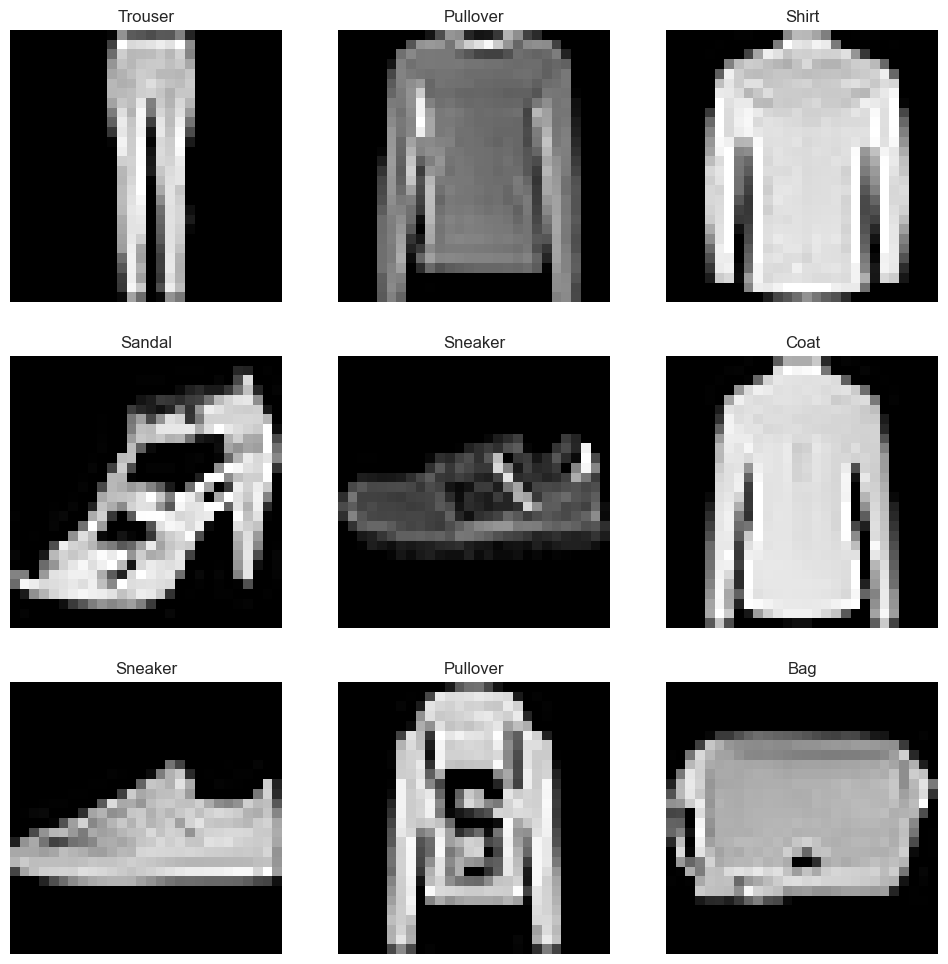

In [49]:
# Visualization
fig, axes = plt.subplots(3, 3, figsize = (12,12))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = clothing_data.drop('label', axis=1).values[index].reshape(28,28)
        cloths = clothing_data['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing_class[cloths])
        axe.set_axis_off()

## Part II. Classfication (20 points)

Now use this image data (variable name 'clothing_data') for the further analysis. Split it into training/validation set and perform the classification algorithm. Report the classfication error and top-5 classfication error.

**Hint**: The following package might be helpful:

+ sklearn.linear_model (LogisticRegression)




In [50]:
reload_ext autoreload

In [52]:
import time
# timer
start_time = time.time()

##############################################################################
### TODO: split your dataset into X and Y then implement your model
##############################################################################
# Your codes here
X = clothing_data.drop(columns=['label'])
Y = clothing_data['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=100)
logistic_model.fit(X_train, Y_train)

Y_pred = logistic_model.predict(X_test)

classification_error = 1 - accuracy_score(Y_test, Y_pred)

top5_classification_error = 1 - top_k_accuracy_score(Y_test, logistic_model.predict_proba(X_test), k=5)

##############################################################################
# END OF YOUR CODE

end_time = time.time()
print(end_time - start_time)
print('Classification Error:', classification_error)
print('Top-5-Classification Error:', top5_classification_error)

14.85395622253418
Classification Error: 0.15125
Top-5-Classification Error: 0.0050000000000000044


## Part III. Prediction Competition (10 points)

Now you have these new observations below (variable name 'clothing_test'). Try your best to predict the clothing label respectively. Submit your final predicted label. Your score will depend on your classfication error and top-5 classication error.

In [106]:
clothing_test = pd.read_csv(_DATA_DIR + 'clothing_test.csv')
clothing_train = pd.read_csv(_DATA_DIR + 'clothing_train.csv')

In [109]:
##############################################################################
### TODO: make your prdictions using your trained model
##############################################################################
X_train = clothing_train.drop(columns=['label'])
y_train = clothing_train['label']
X_test = clothing_test

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

predictions = logistic_model.predict(X_test)
predicted_classes = [clothing_class[label] for label in predictions]

df_pred = pd.DataFrame({'Predicted Label': predictions, 'Predicted Class': predicted_classes})
df_pred
##############################################################################
# END OF YOUR CODE

,Predicted Label,Predicted Class
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,0,T-shirt/top
4,4,Coat
...,...,...
9995,0,T-shirt/top
9996,6,Shirt
9997,8,Bag
9998,8,Bag


In [ ]:
# you donot need to run this code
#y_true = pd.read_csv(_DATA_DIR+'clothing_test_sln.csv').label
#print("mse: ", mean_squared_error(y_pred, y_true))

# Problem 3. Clustering (30 Points)

In this problem, we generate 3 concentric circles for you. You need to implement an appropraite clustering algorithm to seperate the simulated data.

## Part I. Data Generation Process

The following codes generate the simulation data for 3 concentric circles.

<Axes: xlabel='x1', ylabel='x2'>

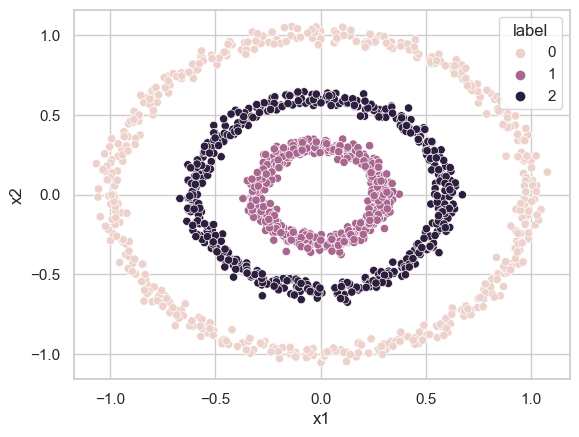

In [59]:
X_small, y_small = make_circles(n_samples=(500,500), random_state=3, 
noise=0.03, factor = 0.3)

X_large, y_large = make_circles(n_samples=(500,500), random_state=3, 
noise=0.03, factor = 0.6)
y_large[y_large==1] = 2

df = pd.DataFrame(np.vstack([X_small,X_large]),columns=['x1','x2'])
df['label'] = np.hstack([y_small,y_large])

sns.scatterplot(data=df,x='x1',y='x2',hue='label')

## Part II. Different Clustering Methods

Now work on this simulated data (variable name `X`) and perform the clustering algorithm. Clarify your algorithm and the parameters within. You are expected to have clusters following the true labels i.e. each circle as a cluster.

+ You are welcome to perform a comparison of the clustering algorithms and benchmark the results, similar to the example in the sklearn documentation: https://scikit-learn.org/stable/modules/clustering.html

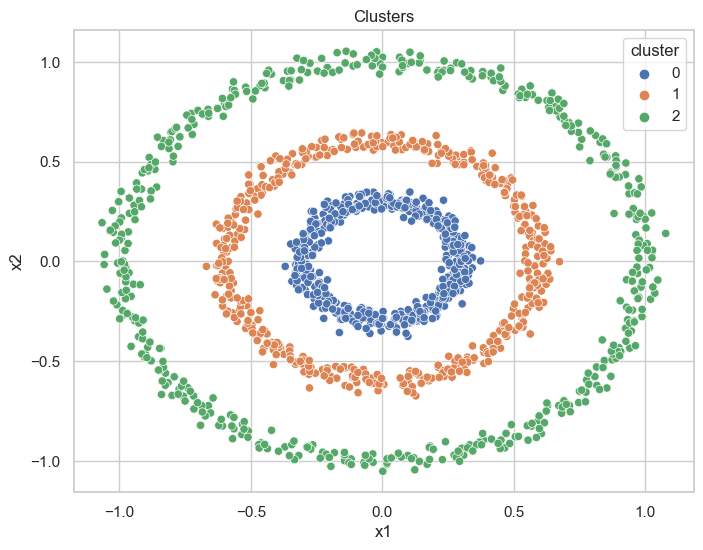

In [70]:
np.random.seed(42)
colors = ['red','green','blue']
X = df[['x1','x2']]
############################################

##############################################################################
### TODO: Implement your clustering algorithm and plot the results
##############################################################################
# Your codes here
df['distance'] = np.sqrt(df['x1']**2 + df['x2']**2)

df['cluster'] = pd.cut(df['distance'], bins=3, labels=[0, 1, 2])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='x1', y='x2', hue='cluster', legend='full')
plt.title('Clusters')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

##############################################################################
# END OF YOUR CODE